In [11]:
# Daten einlesen

wetterdaten <- readRDS("datasets/rds/wetterdaten.rds")

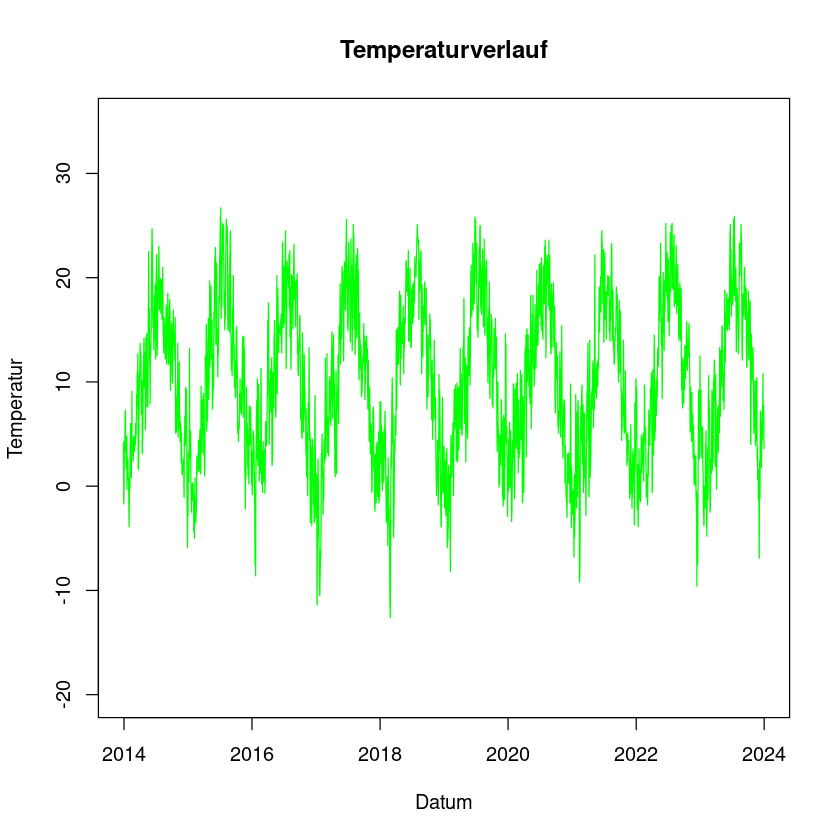

In [12]:
# Exemplarisch: Temperaturverlauf von einer Station als Überblick

plot(
    wetterdaten[[1]]$MESS_DATUM, 
    wetterdaten[[1]]$TMK, 
    type="l", 
    xlab="Datum", ylab="Temperatur", 
    main="Temperaturverlauf", 
    col = "green",
    xlim = c(as.Date("2014-01-01"), as.Date("2023-12-31")), ylim = c(-20, 35)
)

In [13]:
# Zeitindex als unabhängige Variable hinzufügen, weil Datum als unabhängige Variable nicht funktioniert, weil es nicht numerisch ist
wetterdaten[[1]]$Zeitindex <- as.numeric(wetterdaten[[1]]$MESS_DATUM - min(wetterdaten[[1]]$MESS_DATUM))
head(wetterdaten[[1]])

# Unnötige Spalten entfernen, damit cor() auf dataframe angewendet werden kann
wetterdaten[[1]]$MESS_DATUM <- NULL
wetterdaten[[1]]$STATIONS_ID <- NULL
head(wetterdaten[[1]])

,STATIONS_ID,MESS_DATUM,RSK,SDK,TMK,Zeitindex
,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
3985,856,2013-12-29,0.1,0.0,4.2,0
3986,856,2013-12-30,0.0,7.4,1.3,1
3987,856,2013-12-31,0.0,7.2,-1.7,2
3988,856,2014-01-01,0.0,2.8,-1.1,3
3989,856,2014-01-02,0.0,0.0,2.0,4
3990,856,2014-01-03,0.0,4.0,3.9,5


,RSK,SDK,TMK,Zeitindex
,<dbl>,<dbl>,<dbl>,<dbl>
3985,0.1,0.0,4.2,0
3986,0.0,7.4,1.3,1
3987,0.0,7.2,-1.7,2
3988,0.0,2.8,-1.1,3
3989,0.0,0.0,2.0,4
3990,0.0,4.0,3.9,5


In [14]:
# Darstellung von Korrelation
#install.packages("RColorBrewer")
library(RColorBrewer)
#install.packages("MASS")
library(MASS)

,wetterdaten..1...Zeitindex,wetterdaten..1...TMK
,<dbl>,<dbl>
1,0,4.2
2,1,1.3
3,2,-1.7


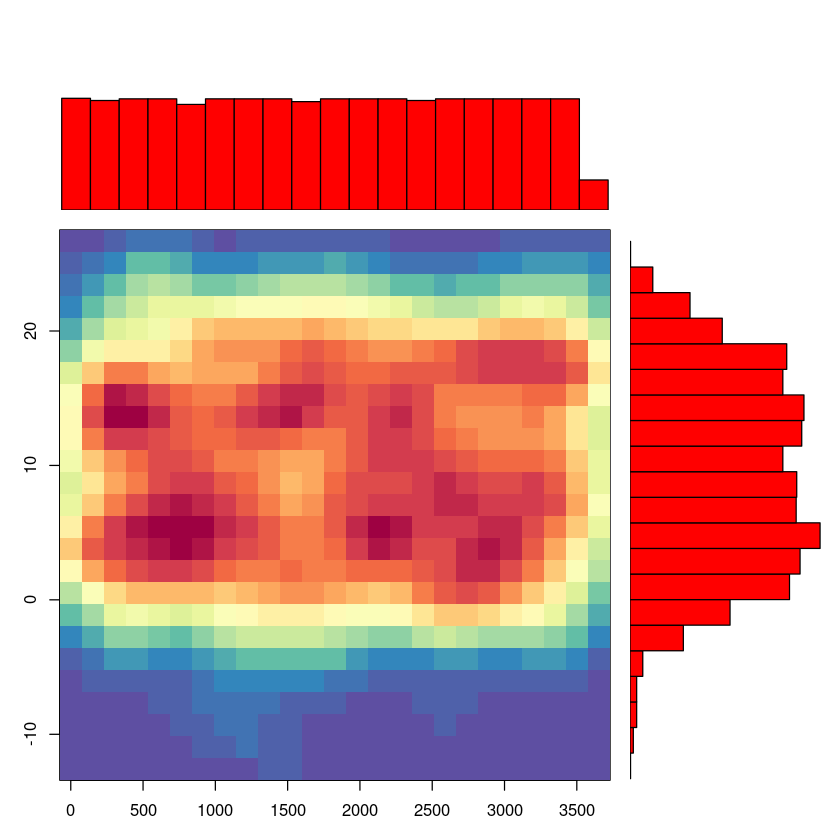

In [15]:
# Darzustellendes Dataframe erzeugen
df_TMK_ZI <- data.frame(wetterdaten[[1]]$Zeitindex, wetterdaten[[1]]$TMK)
head(df_TMK_ZI,n = 3L)
# Farbpallette für Darstellung
rf <- colorRampPalette(rev(brewer.pal(11, "Spectral")))
r <- rf(32)
# Plot erzeugen
h1 <- hist(df_TMK_ZI[,1], breaks=25, plot=FALSE)
h2 <- hist(df_TMK_ZI[,2], breaks=25, plot=FALSE)
top <- max(c(h1$counts, h2$counts))
k <- kde2d(df_TMK_ZI[,1], df_TMK_ZI[,2], n=25)
par(mar = c(3,3,1,1))
layout(matrix(c(2,0,1,3), 2, 2, byrow = TRUE), c(3,1), c(1,3))
image(k, col = r)
par(mar = c(0,2,1,0))
barplot(h1$counts, axes=FALSE, ylim=c(0, top), space=0, col="red")
par(mar = c(2,0,0.5,1))
barplot(h2$counts, axes=FALSE, xlim=c(0, top), space=0, col="red", horiz=TRUE)

In [16]:
# Regressionsanalyse beginnt immer mit Korrelationsanalyse
cor(wetterdaten[[1]])
cor.test(wetterdaten[[1]]$Zeitindex, wetterdaten[[1]]$RSK)
cor.test(wetterdaten[[1]]$Zeitindex, wetterdaten[[1]]$SDK)
cor.test(wetterdaten[[1]]$Zeitindex, wetterdaten[[1]]$TMK)

,RSK,SDK,TMK,Zeitindex
RSK,1.00000000,-0.2828409,0.09379708,0.02873323
SDK,-0.28284094,1.0000000,0.51145518,0.03731950
TMK,0.09379708,0.5114552,1.00000000,0.03685946
Zeitindex,0.02873323,0.0373195,0.03685946,1.00000000



	Pearson's product-moment correlation

data:  wetterdaten[[1]]$Zeitindex and wetterdaten[[1]]$RSK
t = 1.7324, df = 3632, p-value = 0.0833
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.003785166  0.061190916
sample estimates:
       cor 
0.02873323 



	Pearson's product-moment correlation

data:  wetterdaten[[1]]$Zeitindex and wetterdaten[[1]]$SDK
t = 2.2507, df = 3632, p-value = 0.02447
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.004810485 0.069749724
sample estimates:
      cor 
0.0373195 



	Pearson's product-moment correlation

data:  wetterdaten[[1]]$Zeitindex and wetterdaten[[1]]$TMK
t = 2.2229, df = 3632, p-value = 0.02628
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.00434982 0.06929128
sample estimates:
       cor 
0.03685946 
